# colonial regimes

Plot with Altair.

* https://ourworldindata.org/democracy
* https://medium.com/dataexplorations/creating-choropleth-maps-in-altair-eeb7085779a1

In [21]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib as mpl
import pylab as plt

import altair as alt

In [2]:
shapefile = 'data/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159])

In [49]:
df = pd.read_csv('data/colonial_regimes.csv')
#Merge dataframes gdf and df
key = df.columns[2]
df['regime_code'] = pd.Categorical(df.Regime).codes
df=df[df.Year==1850]
merged = gdf.merge(df, left_on = 'country', right_on = 'Entity', how = 'left')
merged[key] = merged[key].fillna(0)
print (merged.Regime.unique())

[0 'United Kingdom' 'Russia' 'Netherlands' 'Egypt' 'Sudan' 'USA' 'Sweden'
 'Colombia' 'Spain' 'France' 'Portugal' 'Turkey' 'Thailand' 'Korea'
 'China' 'Mixed Rule' 'Germany' 'Austria-Hungary' 'Denmark']


In [ ]:
key=df.columns[2]
fig, ax = plt.subplots(1, figsize=(14, 8))
merged.plot(column='regime_code', cmap='Set1', linewidth=0.8, ax=ax, edgecolor='black')
ax.axis('off')
ax.set_title('colonial regimes', fontsize=18)
plt.tight_layout()

## altair

In [45]:
choro_json = json.loads(merged.to_json())
choro_data = alt.Data(values=choro_json['features'])

In [65]:
def gen_map(geodata, color_column, title, tooltip, color_scheme='bluegreen'):
    '''Generates map using json data'''
    
    selection = alt.selection_multi(fields=[color_column])
    color = alt.condition(selection,
              alt.Color(color_column, type='nominal',
              scale=alt.Scale(scheme=color_scheme)),
              alt.value('lightgray'))
    # Add Base Layer
    base = alt.Chart(geodata, title = title).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=900,
        height=500
    )
    # Add Choropleth Layer
    choro = alt.Chart(geodata).mark_geoshape(
        fill='lightgray',
        stroke='black'
    ).encode(
        color=color,
         tooltip=tooltip    
    ).add_selection(
        selection
    )
    return base + choro

In [66]:
mymap = gen_map(geodata=choro_data, color_column='properties.regime_code',
                      title='Colonial Regimes', 
                      tooltip=['properties.Country:O','properties.regime_code:Q'],
                      color_scheme='spectral')


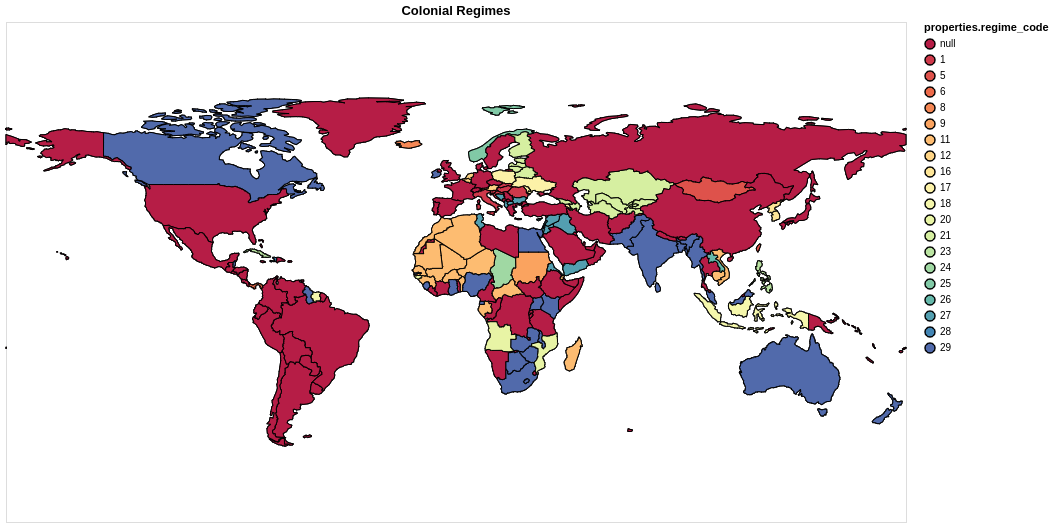

In [67]:
#mymap
mymap.project('equirectangular')